# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [32]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


613


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:

# lists for response results
lat = []
lon = []
humidity = []
temp_max = []
wind = []
cloudiness = []
city_name = []
country = []
date = []
count = 0

# loop through cities, make API request, and append desired results
print('Beginning Data Retrieval')
print('------------------------')
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        humidity.append(response['main']['humidity'])
        temp_max.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except (IndexError, KeyError, TypeError):
        cities.remove(city)
    count += 1
    print('City', count)
    print(query_url, city)
print('----------------------')    
print('Data Retrieval Complete')
print('----------------------')

Beginning Data Retrieval
------------------------
City 1
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= udachnyy
City 2
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= lingyuan
City 3
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= yellowknife
City 4
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= kiboga
City 5
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= dikson
City 6
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= koslan
City 7
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= pisco
City 8
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= makak

City 69
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= new norfolk
City 70
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= ribeira grande
City 71
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= pierre
City 72
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= gat
City 73
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= te anau
City 74
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= vao
City 75
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= chama
City 76
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= macaubas
City 77
http://api.openweathermap.org/d

City 137
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= arraial do cabo
City 138
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= belyy yar
City 139
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= thompson
City 140
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= pangai
City 141
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= komsomolskiy
City 142
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= oulu
City 143
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= bosaso
City 144
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= najran
City 145
http://api.op

City 204
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= severo-kurilsk
City 205
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= colares
City 206
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= berovo
City 207
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= manoel urbano
City 208
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= east london
City 209
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= baykalovo
City 210
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= quatre cocos
City 211
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= emet
City 212
htt

City 271
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= juba
City 272
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= edd
City 273
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= dzhebariki-khaya
City 274
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= lompoc
City 275
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= broome
City 276
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= maniitsoq
City 277
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= zile
City 278
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= tiksi
City 279
http://api.openweathermap.

City 339
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= mabaruma
City 340
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= shuya
City 341
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= waslala
City 342
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= katsuura
City 343
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= marawi
City 344
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= snyder
City 345
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= codrington
City 346
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= faanui
City 347
http://api.openweatherm

City 407
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= vinhedo
City 408
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= lakeside
City 409
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= stephenville
City 410
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= aketi
City 411
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= bathsheba
City 412
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= nakamura
City 413
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= nueve de julio
City 414
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= velsk
City 415
http://api.

City 475
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= fiumicino
City 476
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= sistranda
City 477
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= saint-augustin
City 478
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= berdigestyakh
City 479
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= morondava
City 480
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= puerto varas
City 481
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= finschhafen
City 482
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= igrim
City 4

City 543
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= iberia
City 544
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= moron
City 545
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= nador
City 546
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= salina
City 547
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= tateyama
City 548
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= carahue
City 549
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= fonte boa
City 550
http://api.openweathermap.org/data/2.5/weather?appid=d6cdef50ec164127402f7834412b911b&units=imperial&q= mazagao
City 551
http://api.openweathermap.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
# Check that the number of cities is equal to the number of the other items collected
print('Length of city list:', len(cities))
print('Lng', len(lon))
print('Lat', len(lat))
print('Hum', len(humidity))
print('temp', len(temp_max))
print('wind', len(wind))
print('cld', len(cloudiness))
print('name', len(city_name))
print('country', len(country))

Length of city list: 552
Lng 552
Lat 552
Hum 552
temp 552
wind 552
cld 552
name 552
country 552


In [44]:
# Create dataframe
cities_df = pd.DataFrame({'City': cities})
cities_df['Country']= country
cities_df['Max Temp']= temp_max
cities_df['Cloudiness']= cloudiness
cities_df['Humidity']= humidity
cities_df['Wind Speed']= wind
cities_df['Latitude']= lat
cities_df['Longitude']= lon

# Show dataframe
cities_df.head()

,City,Country,Max Temp,Cloudiness,Humidity,Wind Speed,Latitude,Longitude
0,udachnyy,RU,24.80,40,85,2.24,66.42,112.40
1,lingyuan,CN,61.69,0,39,3.78,41.24,119.40
2,yellowknife,CA,37.40,20,55,8.05,62.45,-114.38
3,kiboga,UG,63.09,22,98,2.48,0.92,31.77
4,dikson,RU,31.43,99,89,8.03,73.51,80.55


In [45]:
# Write dataframe to csv file
cities_df.to_csv("cities_python_api.csv", encoding="utf-8", index=False)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

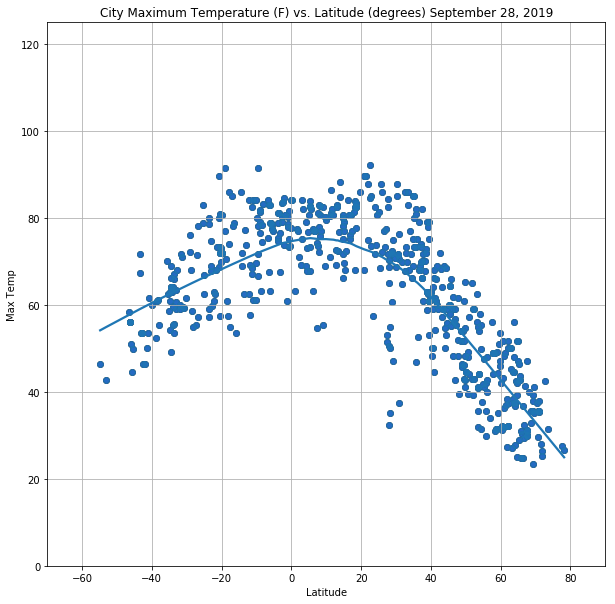

In [61]:
# Plot Temperature (F) vs. Latitude
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(cities_df['Latitude'], cities_df['Max Temp'], color ='blue', marker='o',edgecolors="black", alpha=0.75)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title('City Maximum Temperature (F) vs. Latitude (degrees) September 28, 2019')
plt.ylim(0, 125)
plt.xlim(-70, 90)

# Fit a non-linear curve to this data
sns.regplot(cities_df['Latitude'], cities_df['Max Temp'], lowess=True)

# Add a grid
plt.grid()

# Save the figure and then show it
plt.savefig('temp_lat_with_curve2.png')
plt.show()


#### Latitude vs. Humidity Plot

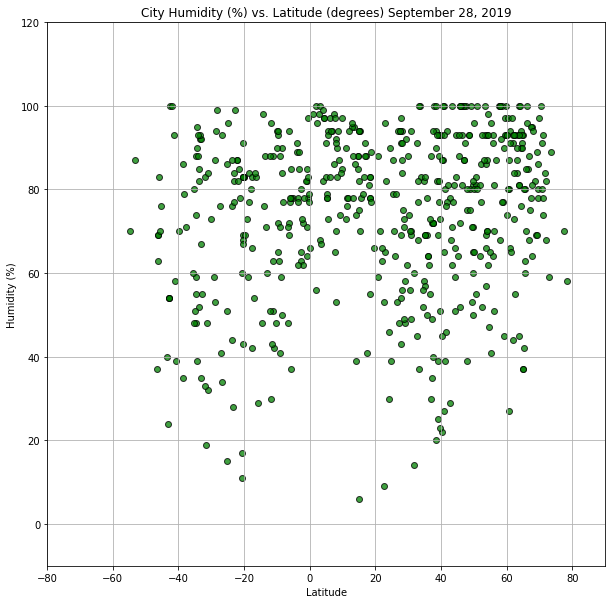

In [56]:
# Plot Humidity (%) vs. Latitude
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(cities_df['Latitude'], cities_df['Humidity'], color ='green', marker='o',edgecolors="black", alpha=0.75)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('City Humidity (%) vs. Latitude (degrees) September 28, 2019')
plt.ylim(-10, 120)
plt.xlim(-80, 90)

plt.grid()

plt.savefig('hum_lat2.png')
plt.show()

#### Latitude vs. Cloudiness Plot

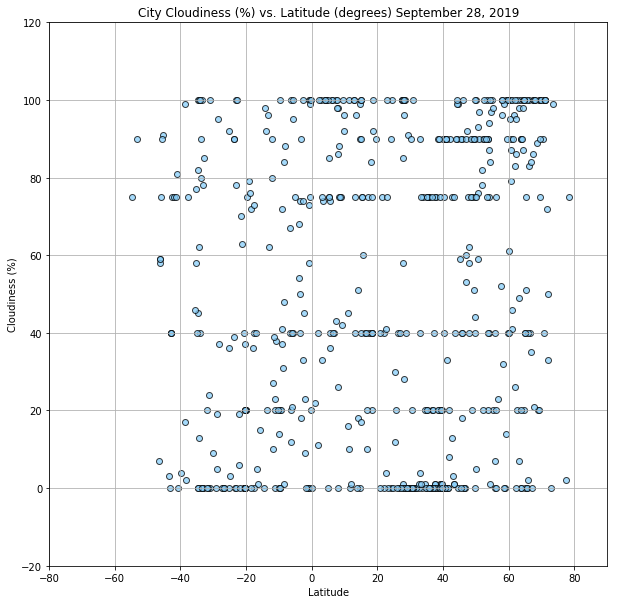

In [58]:
#Cloudiness (%) vs. Latitude
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(cities_df['Latitude'], cities_df['Cloudiness'], color ='lightskyblue', marker='o',edgecolors="black", alpha=0.75)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('City Cloudiness (%) vs. Latitude (degrees) September 28, 2019')
plt.ylim(-20, 120)
plt.xlim(-80, 90)

plt.grid()

plt.savefig('cloud_lat2.png')
plt.show()


#### Latitude vs. Wind Speed Plot

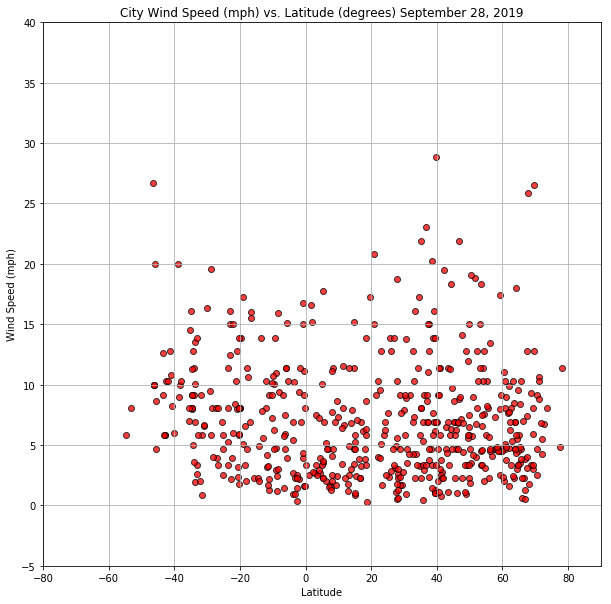

In [59]:
#Wind Speed (%) vs. Latitude
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(cities_df['Latitude'], cities_df['Wind Speed'], color ='red', marker='o',edgecolors="black", alpha=0.75)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('City Wind Speed (mph) vs. Latitude (degrees) September 28, 2019')
plt.ylim(-5, 40)
plt.xlim(-80, 90)

plt.grid()

plt.savefig('wind_lat2.png')
plt.show()
